In [566]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [567]:
import warnings
warnings.filterwarnings("ignore")

In [761]:
df= pd.read_excel(r'/Users/iqrabismi/Desktop/data.xlsx', sheet_name = 'Model_Population')

In [762]:
df.head(4)

Lease ID  Monthly Rent ($ per Sq. Ft.) Transaction Type Customer Industry  \
0     53884                      6.350155          Renewal        Wholesaler   
1     56140                      6.733505          Renewal        Wholesaler   
2     64052                      6.665145   Original Lease          Retailer   
3     54897                      5.883000          Renewal        Wholesaler   

   Lease - Total Term (Month)  Lease - Free Rent (Month)  \
0                        24.0                        0.0   
1                        24.0                        0.0   
2                        24.0                        0.0   
3                        24.0                        NaN   

   Property - Size (Sq. Ft.)  Property - Speed Bay  Property - Year Built  \
0                     656040                  50.0                   2008   
1                     445200                  60.0                   1996   
2                     172998                  60.0                   1999   
3                     395954                  50.0                   1998   

   Property - Office Area  
0                   33000  
1                    4150  
2                   12147  
3                    5520

In [764]:
df.columns = ['Lease_Id','MonthlyRentperSqft','Transaction_type','Customer_Industry','Lease_TotalTermMonth','Lease_FreeRentMonth','Property_size','Property_speedbay','Property_YearBuilt','Property_OfficeArea']

In [765]:
df.head(4)

Lease_Id  MonthlyRentperSqft Transaction_type Customer_Industry  \
0     53884            6.350155          Renewal        Wholesaler   
1     56140            6.733505          Renewal        Wholesaler   
2     64052            6.665145   Original Lease          Retailer   
3     54897            5.883000          Renewal        Wholesaler   

   Lease_TotalTermMonth  Lease_FreeRentMonth  Property_size  \
0                  24.0                  0.0         656040   
1                  24.0                  0.0         445200   
2                  24.0                  0.0         172998   
3                  24.0                  NaN         395954   

   Property_speedbay  Property_YearBuilt  Property_OfficeArea  
0               50.0                2008                33000  
1               60.0                1996                 4150  
2               60.0                1999                12147  
3               50.0                1998                 5520

## Data Preprocessing & Exploratory Data Analysis

In [684]:
from pandas_profiling import ProfileReport

In [685]:
report = ProfileReport(df)

In [686]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Report above tells us that there are missing values in Lease_TotalTermMonth, Lease_FreeRentMonth. There are total two missing values, hence imputing these missing values with KNN Imputation. KNN Imputation works well when we want to preserve the relationship as variables have a meaningful relationship with each other, and imputing the missing values in a way that disrupts these relationships can lead to biased or incorrect results.  

In [575]:
from sklearn.impute import KNNImputer #importing the package

In [576]:
knn= KNNImputer(n_neighbors=3)

In [577]:
lease_freerent = knn.fit_transform(df.Lease_FreeRentMonth.values.reshape(-1,1))

In [578]:
df['Lease_FreeRentMonth'] = lease_freerent

In [579]:
lease_freetermmonth = knn.fit_transform(df.Lease_TotalTermMonth.values.reshape(-1,1))

In [580]:
df['Lease_TotalTermMonth'] =lease_freetermmonth

In [581]:
df.isna().sum()

Lease_Id                0
MonthlyRentperSqft      0
Transaction_type        0
Customer_Industry       0
Lease_TotalTermMonth    0
Lease_FreeRentMonth     0
Property_size           0
Property_speedbay       0
Property_YearBuilt      0
Property_OfficeArea     0
dtype: int64

In [582]:
df.Lease_Id.nunique() 


84

##### As the cardinality of Lease Id is high and including this feature in modelling is not relevant. Hence Dropping the feature.

In [766]:
df.drop('Lease_Id', axis = 1, inplace=True)

##### As per the report, there is no duplicate values in the datatset. 


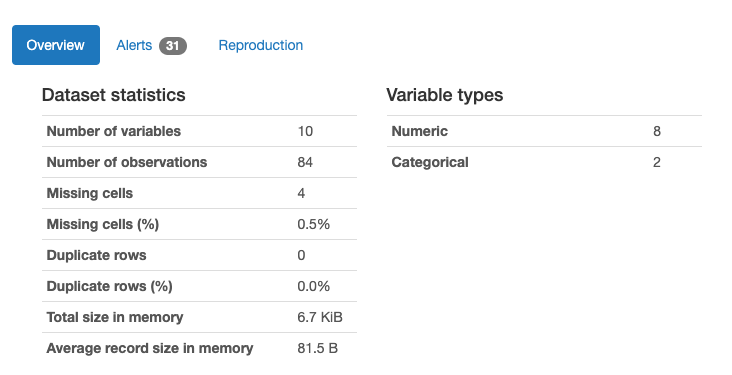

### Data Distribution for all features

In [688]:
df_numeric = df.select_dtypes(include=['int','float'])

array([[<AxesSubplot:title={'center':'MonthlyRentperSqft'}>,
        <AxesSubplot:title={'center':'Lease_TotalTermMonth'}>,
        <AxesSubplot:title={'center':'Lease_FreeRentMonth'}>],
       [<AxesSubplot:title={'center':'Property_size'}>,
        <AxesSubplot:title={'center':'Property_speedbay'}>,
        <AxesSubplot:title={'center':'Property_YearBuilt'}>],
       [<AxesSubplot:title={'center':'Property_OfficeArea'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

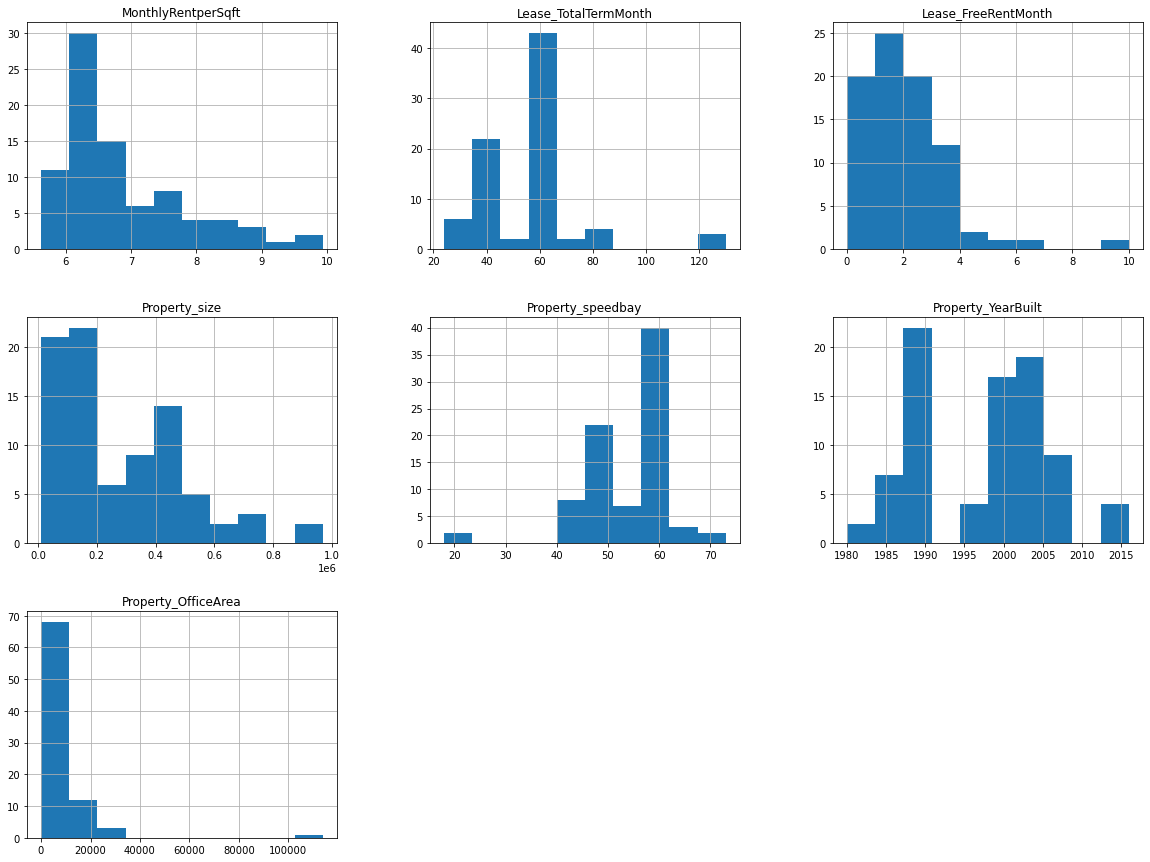

In [689]:
df_numeric.hist(figsize=(20,15))

<AxesSubplot:xlabel='MonthlyRentperSqft', ylabel='Density'>

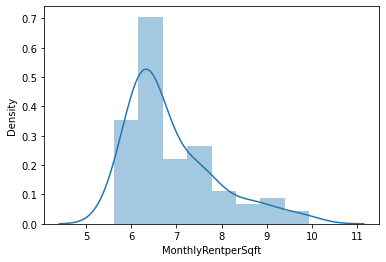

In [690]:
sns.distplot(df.MonthlyRentperSqft, kde=True) #distribution for Monthly Rent is skewed.

In [767]:
# apply log transformation
df['MonthlyRentperSqft'] = np.log(df['MonthlyRentperSqft'])

<AxesSubplot:xlabel='MonthlyRentperSqft', ylabel='Density'>

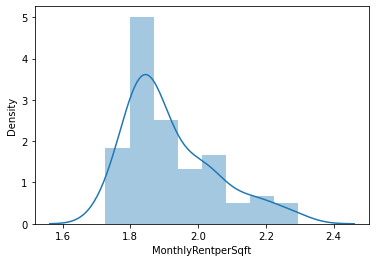

In [768]:
sns.distplot(df.MonthlyRentperSqft, kde=True)

In [769]:
# apply log transformation
df['Property_size'] = np.log(df['Property_size'])

<AxesSubplot:xlabel='Property_size', ylabel='Density'>

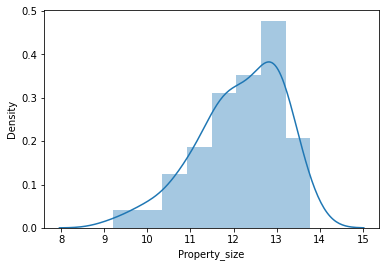

In [770]:
sns.distplot(df.Property_size, kde=True)

#### Skewness Measurement for all variables


In [771]:
from scipy.stats import skew

In [772]:
for i in df_numeric.columns:
    print(i)
    print("---------------")
    print(skew(df[i]))
    print("\n")
    

MonthlyRentperSqft
---------------
0.9971800429932121


Lease_TotalTermMonth
---------------
nan


Lease_FreeRentMonth
---------------
nan


Property_size
---------------
-0.7013540655851975


Property_speedbay
---------------
-1.415165386254714


Property_YearBuilt
---------------
-0.015227004408249607


Property_OfficeArea
---------------
6.510286128875114




#### Measuring Kurtosis for all variables

In [693]:
from scipy.stats import kurtosis

In [694]:
for i in df_numeric.columns:
    print(i)
    print("---------------")
    print(kurtosis(df[i]))
    print("\n")

MonthlyRentperSqft
---------------
0.9980510640657201


Lease_TotalTermMonth
---------------
nan


Lease_FreeRentMonth
---------------
nan


Property_size
---------------
0.5053126296028925


Property_speedbay
---------------
3.39735131930276


Property_YearBuilt
---------------
-0.9248454919312818


Property_OfficeArea
---------------
49.352426832828456




### Relationship between dependent and independent variables

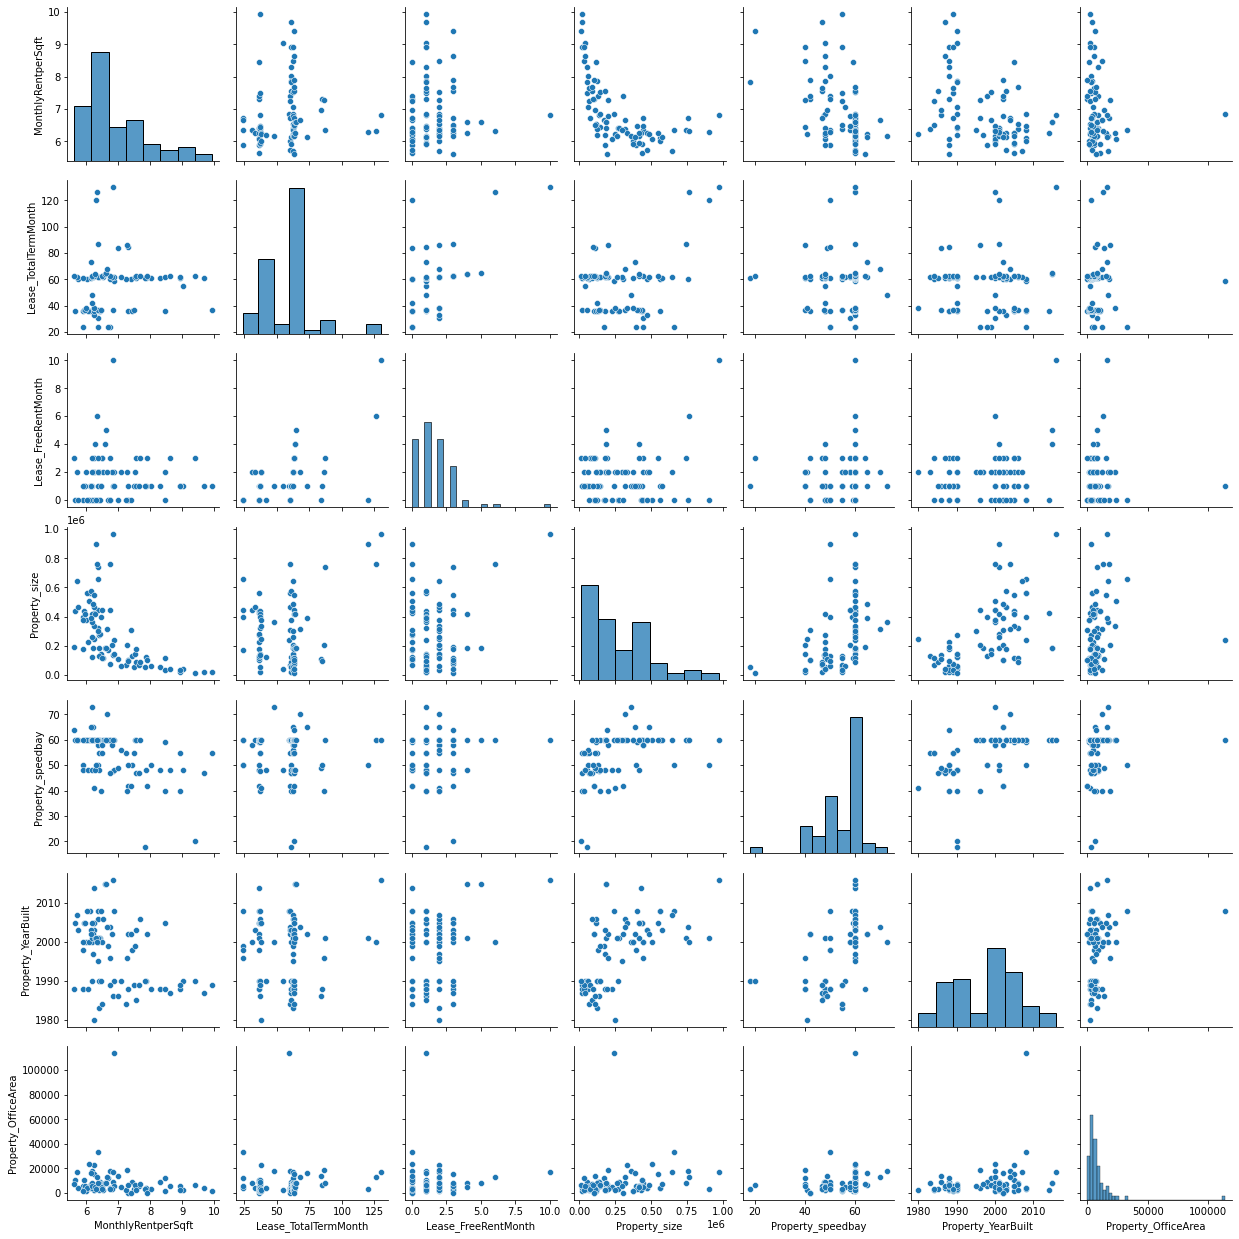

In [773]:
sns.pairplot(df_numeric)

##### From the pair plot we can see that monthly rent is negatively related with property size. Also the Pearson correlation coefficient is -0.65. From the graph, the relationship doesn't seem linear. Hence, Using non- parametric test to find the correlation value. 

In [774]:
df.MonthlyRentperSqft.corr(df.Property_size)

-0.8344474926790609

In [775]:
from scipy.stats import spearmanr # importing the  Spearman rank correlation module. 

##### Spearman rank correlation is a measure of the monotonic association between two variables.

In [776]:
corr, p_value = spearmanr(df.Property_size, df.MonthlyRentperSqft)

print("Spearman rank correlation:", corr)
print("P-value:", p_value)

Spearman rank correlation: -0.7413418657929616
P-value: 7.37168884065726e-16


##### From the test above, p value and corr value tells that monthly rent is negatively correlated with property size and is statistically significant at 5% level

### Finding the correlation value wrt to other independent values as well. I will be using spearsman Rank test as the variables are not linearly related.

In [777]:
for i in range(1,7):
    corr, p_value = spearmanr(df_numeric.iloc[:,i], df_numeric.MonthlyRentperSqft)
    print('Relation between Monthly rent and ', df_numeric.columns[i])
    print("--------------------------------")
    print("Spearman rank correlation:", corr)
    print("P-value:", p_value)
    print("\n")

Relation between Monthly rent and  Lease_TotalTermMonth
--------------------------------
Spearman rank correlation: nan
P-value: nan


Relation between Monthly rent and  Lease_FreeRentMonth
--------------------------------
Spearman rank correlation: nan
P-value: nan


Relation between Monthly rent and  Property_size
--------------------------------
Spearman rank correlation: -0.7413418657929616
P-value: 7.37168884065726e-16


Relation between Monthly rent and  Property_speedbay
--------------------------------
Spearman rank correlation: -0.5385523204683161
P-value: 1.2625331627100678e-07


Relation between Monthly rent and  Property_YearBuilt
--------------------------------
Spearman rank correlation: -0.3556843300553764
P-value: 0.0008990725916052265


Relation between Monthly rent and  Property_OfficeArea
--------------------------------
Spearman rank correlation: -0.19020377208640943
P-value: 0.08309851239837997




##### From the results above we can see that Lease_TotalTermMonth,Lease_FreeRentMonth, Lease_FreeRentMonth and Property_OfficeArea are not correlated as result is not statistically significant.  However, Property_size, Property_speedbay  and Property_YearBuilt are correlated.                                                                      

### Relationship between dependent and Categorical independent variables

Text(0, 0.5, 'Monthly Rent')

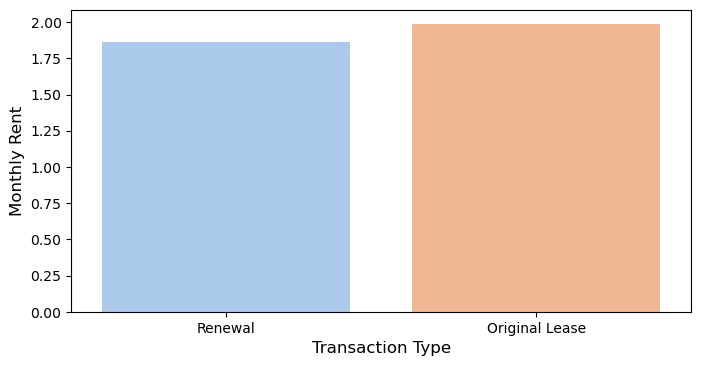

In [778]:
plt.figure(figsize=(8,4), dpi=100)
sns.barplot(data= df,x= 'Transaction_type', y= 'MonthlyRentperSqft', palette='pastel', ci= None)
plt.xlabel('Transaction Type', size= 12)
plt.ylabel('Monthly Rent', size = 12)

Text(0, 0.5, 'Monthly Rent')

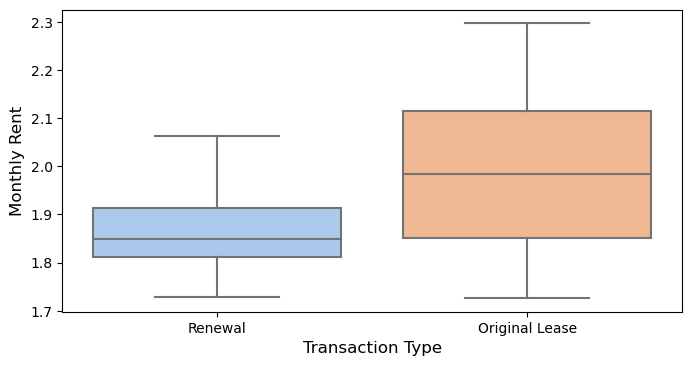

In [779]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data= df,x= 'Transaction_type', y= 'MonthlyRentperSqft', palette='pastel')
plt.xlabel('Transaction Type', size= 12)
plt.ylabel('Monthly Rent', size = 12)

In [780]:
df.Customer_Industry.value_counts(normalize=True, ascending=False).reset_index()

index  Customer_Industry
0                       Wholesaler           0.357143
1                              3PL           0.250000
2                      Unspecified           0.178571
3                         Retailer           0.095238
4                     Manufacturer           0.071429
5  Transportation/Freight/Delivery           0.023810
6      Charity/Prof.Services/Other           0.023810

Text(0, 0.5, 'Monthly Rent')

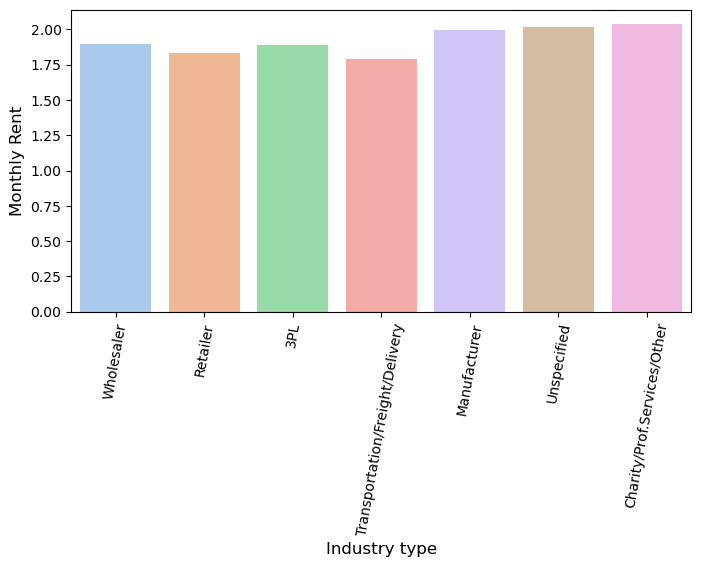

In [781]:
plt.figure(figsize=(8,4), dpi=100)
sns.barplot(data= df,x= 'Customer_Industry', y= 'MonthlyRentperSqft', palette='pastel', ci= None)
plt.xlabel('Industry type', size= 12)
plt.xticks(rotation=80)
plt.ylabel('Monthly Rent', size = 12)

Text(0, 0.5, 'Monthly Rent')

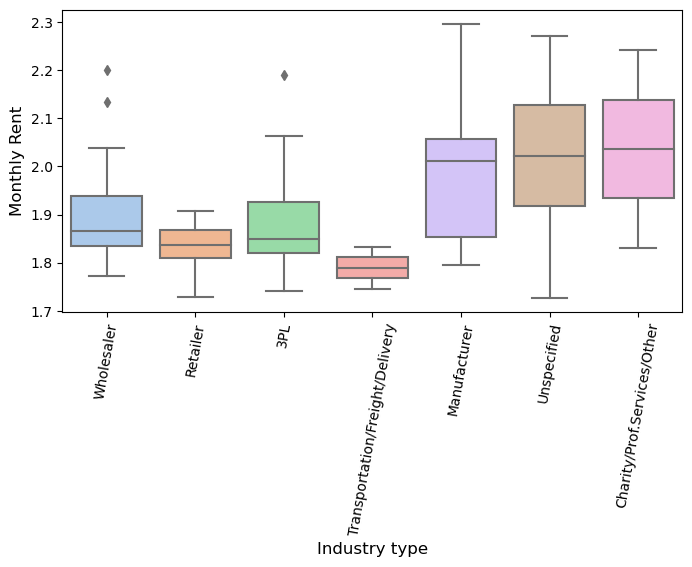

In [782]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data= df,x= 'Customer_Industry', y= 'MonthlyRentperSqft', palette='pastel')
plt.xlabel('Industry type', size= 12)
plt.xticks(rotation=80)
plt.ylabel('Monthly Rent', size = 12)

##### From the barplots above, we can see that there is monthly rate is high for original Lease as compared to Renewal. 
##### Montly rate is high for Manufactures, Unspecified and charity/prof.service. 

### Implementing one way Anova  Test to check if there is significant difference in monthly rent for all Industry Type

In [783]:
import pingouin as pg

In [784]:
anova = pg.anova(data=df, dv='MonthlyRentperSqft', between='Customer_Industry')




# Print ANOVA results
print(anova)

              Source  ddof1  ddof2         F     p-unc       np2
0  Customer_Industry      6     77  3.884304  0.001934  0.232348


In [785]:
ttests = pg.pairwise_ttests(data=df, dv='MonthlyRentperSqft', between='Customer_Industry', padjust='bonf')

ttests

Contrast                                A  \
0   Customer_Industry                              3PL   
1   Customer_Industry                              3PL   
2   Customer_Industry                              3PL   
3   Customer_Industry                              3PL   
4   Customer_Industry                              3PL   
5   Customer_Industry                              3PL   
6   Customer_Industry      Charity/Prof.Services/Other   
7   Customer_Industry      Charity/Prof.Services/Other   
8   Customer_Industry      Charity/Prof.Services/Other   
9   Customer_Industry      Charity/Prof.Services/Other   
10  Customer_Industry      Charity/Prof.Services/Other   
11  Customer_Industry                     Manufacturer   
12  Customer_Industry                     Manufacturer   
13  Customer_Industry                     Manufacturer   
14  Customer_Industry                     Manufacturer   
15  Customer_Industry                         Retailer   
16  Customer_Industry                         Retailer   
17  Customer_Industry                         Retailer   
18  Customer_Industry  Transportation/Freight/Delivery   
19  Customer_Industry  Transportation/Freight/Delivery   
20  Customer_Industry                      Unspecified   

                                  B  Paired  Parametric         T        dof  \
0       Charity/Prof.Services/Other   False        True -0.716426   1.027462   
1                      Manufacturer   False        True -1.381820   6.032549   
2                          Retailer   False        True  1.748443  23.405464   
3   Transportation/Freight/Delivery   False        True  1.990884   1.691580   
4                       Unspecified   False        True -2.938329  24.755311   
5                        Wholesaler   False        True -0.342462  41.302127   
6                      Manufacturer   False        True  0.173948   1.287338   
7                          Retailer   False        True  0.986943   1.020758   
8   Transportation/Freight/Delivery   False        True  1.176995   2.000000   
9                       Unspecified   False        True  0.079864   1.068682   
10                       Wholesaler   False        True  0.667729   1.016766   
11                         Retailer   False        True  2.103257   5.760835   
12  Transportation/Freight/Delivery   False        True  2.387708   5.731328   
13                      Unspecified   False        True -0.252457   7.612517   
14                       Wholesaler   False        True  1.273469   5.625666   
15  Transportation/Freight/Delivery   False        True  0.898020   1.501470   
16                      Unspecified   False        True -4.334983  20.108501   
17                       Wholesaler   False        True -2.352262  19.766398   
18                      Unspecified   False        True -3.998071   2.951781   
19                       Wholesaler   False        True -2.307440   1.404455   
20                       Wholesaler   False        True  2.869995  21.145024   

   alternative     p-unc    p-corr p-adjust    BF10    hedges  
0    two-sided  0.601622  1.000000     bonf   0.614 -1.145907  
1    two-sided  0.216020  1.000000     bonf   0.777 -0.828561  
2    two-sided  0.093494  1.000000     bonf   1.108  0.544387  
3    two-sided  0.207442  1.000000     bonf    1.53  0.882234  
4    two-sided  0.007042  0.147885     bonf   7.531 -1.018826  
5    two-sided  0.733740  1.000000     bonf   0.298 -0.097105  
6    two-sided  0.885216  1.000000     bonf   0.567  0.159917  
7    two-sided  0.501504  1.000000     bonf   0.715  1.578218  
8    two-sided  0.360302  1.000000     bonf   0.841  0.672569  
9    two-sided  0.948621  1.000000     bonf   0.541  0.098949  
10   two-sided  0.623702  1.000000     bonf   0.599  1.176206  
11   two-sided  0.082038  1.000000     bonf   1.641  1.209039  
12   two-sided  0.056142  1.000000     bonf   1.786  1.058759  
13   two-sided  0.807370  1.000000     bonf   0.427 -0.130344  
14   two-sided 

##### From the results above, we can see there is no statistical difference between  Manufactures, Unspecified and charity/prof.service. However, overall p - value using one way anova was less than 0.05, which suggest that there is statistical difference between different groups wrt monthly Rate. Hence, industry type will be included in modelling.

### Clamping Outliers 

In [786]:
df_numeric

MonthlyRentperSqft  Lease_TotalTermMonth  Lease_FreeRentMonth  \
0             6.350155                  24.0                  0.0   
1             6.733505                  24.0                  0.0   
2             6.665145                  24.0                  0.0   
3             5.883000                  24.0                  NaN   
4             6.356946                  31.0                  2.0   
..                 ...                   ...                  ...   
79            7.268996                  86.0                  2.0   
80            6.360548                  87.0                  3.0   
81            6.296031                 120.0                  0.0   
82            6.332098                 126.0                  6.0   
83            6.831229                 130.0                 10.0   

    Property_size  Property_speedbay  Property_YearBuilt  Property_OfficeArea  
0          656040               50.0                2008                33000  
1          445200               60.0                1996                 4150  
2          172998               60.0                1999                12147  
3          395954               50.0                1998                 5520  
4          441970               58.0                2000                 8453  
..            ...                ...                 ...                  ...  
79         201454               40.0                1996                18677  
80         741458               60.0                2001                 8456  
81         901662               50.0                2001                 3030  
82         763228               60.0                2000                12971  
83         970073               60.0                2016                16667  

[84 rows x 7 columns]

In [787]:
from scipy.stats.mstats import winsorize

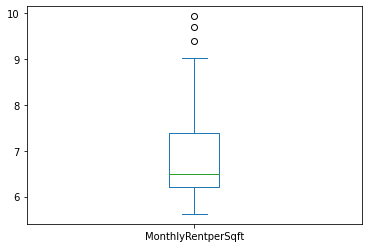

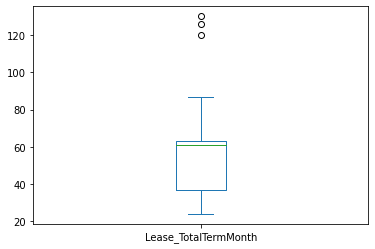

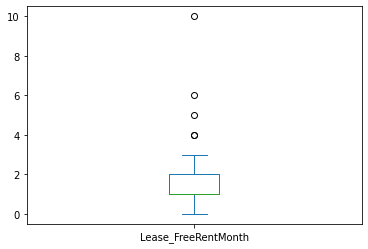

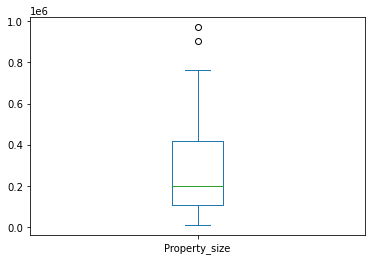

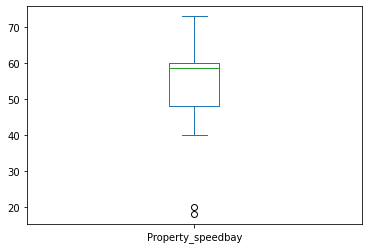

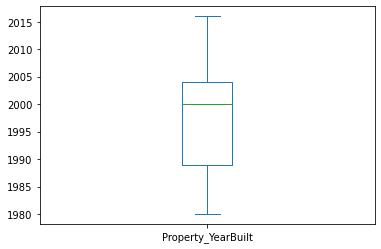

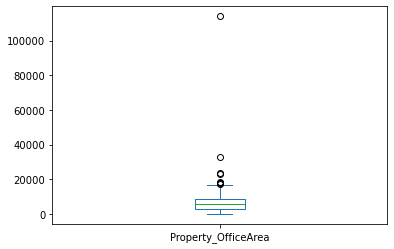

In [788]:
for i in df_numeric.columns:
    df_numeric[i].plot(kind='box')
    plt.show()

In [789]:
### clamping 5% bottom and upper values
for i in df_numeric.columns[1:]:
    df[i]= winsorize(df[i],(0.05,0.05))

## Data Quality Report for Numeric and Categorical Variables

In [790]:
df_numeric.describe().transpose()

count           mean            std          min  \
MonthlyRentperSqft     84.0       6.875983       0.977952     5.621233   
Lease_TotalTermMonth   82.0      56.048780      20.284338    24.000000   
Lease_FreeRentMonth    82.0       1.585366       1.570965     0.000000   
Property_size          84.0  279097.380952  219862.981356  9862.000000   
Property_speedbay      84.0      54.104762       9.104995    18.000000   
Property_YearBuilt     84.0    1997.583333       8.537950  1980.000000   
Property_OfficeArea    84.0    8454.059524   13047.111063     0.000000   

                                25%            50%           75%  \
MonthlyRentperSqft         6.212876       6.496834       7.39815   
Lease_TotalTermMonth      37.000000      61.000000      63.00000   
Lease_FreeRentMonth        1.000000       1.000000       2.00000   
Property_size         107500.000000  201473.500000  419296.50000   
Property_speedbay         48.000000      58.500000      60.00000   
Property_YearBuilt      1989.000000    2000.000000    2004.00000   
Property_OfficeArea     3037.500000    5712.000000    8743.50000   

                                max  
MonthlyRentperSqft         9.939065  
Lease_TotalTermMonth     130.000000  
Lease_FreeRentMonth       10.000000  
Property_size         970073.000000  
Property_speedbay         73.000000  
Property_YearBuilt      2016.000000  
Property_OfficeArea   113949.000000

In [791]:
df.select_dtypes(exclude=['int','float']).describe().transpose()

count unique         top freq
Transaction_type     84      2     Renewal   47
Customer_Industry    84      7  Wholesaler   30

<AxesSubplot:xlabel='Property_YearBuilt', ylabel='MonthlyRentperSqft'>

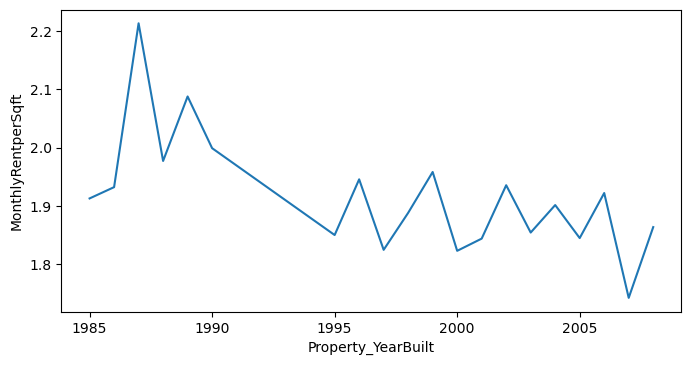

In [792]:
plt.figure(figsize=(8,4), dpi=100)
sns.lineplot(data=df, x='Property_YearBuilt',y='MonthlyRentperSqft', ci=None)

## Feature Transformation

In [793]:
df.head(3)

MonthlyRentperSqft Transaction_type Customer_Industry  \
0            1.848479          Renewal        Wholesaler   
1            1.907096          Renewal        Wholesaler   
2            1.896892   Original Lease          Retailer   

   Lease_TotalTermMonth  Lease_FreeRentMonth  Property_size  \
0                  31.0                  0.0      13.393977   
1                  31.0                  0.0      13.006279   
2                  31.0                  0.0      12.061035   

   Property_speedbay  Property_YearBuilt  Property_OfficeArea  
0               50.0                2008                18677  
1               60.0                1996                 4150  
2               60.0                1999                12147

##### As monthly rent is more for original lease as compare to renewal. Hence, encoding categorical data into map

In [794]:
coding = {'Renewal': 0 , 'Original Lease':1}

In [795]:
df['Transaction_type'] = df['Transaction_type'].map(coding)

##### Encoding  Customer_Industry using pd.get_dummies

In [796]:
df= pd.get_dummies(df, columns= ['Customer_Industry'], drop_first=True)

In [797]:
df.head(2)

MonthlyRentperSqft  Transaction_type  Lease_TotalTermMonth  \
0            1.848479                 0                  31.0   
1            1.907096                 0                  31.0   

   Lease_FreeRentMonth  Property_size  Property_speedbay  Property_YearBuilt  \
0                  0.0      13.393977               50.0                2008   
1                  0.0      13.006279               60.0                1996   

   Property_OfficeArea  Customer_Industry_Charity/Prof.Services/Other  \
0                18677                                              0   
1                 4150                                              0   

   Customer_Industry_Manufacturer  Customer_Industry_Retailer  \
0                               0                           0   
1                               0                           0   

   Customer_Industry_Transportation/Freight/Delivery  \
0                                                  0   
1                                                  0   

   Customer_Industry_Unspecified  Customer_Industry_Wholesaler  
0                              0                             1  
1                              0                             1

## Feature Scaling 

#### Using MinMaxScaler. 

In [798]:
from sklearn.preprocessing import MinMaxScaler

In [799]:
scaler= MinMaxScaler()

In [800]:
for i in df.columns[1:]:
    val = scaler.fit_transform(df[i].values.reshape(-1,1))
    df[i] = val

In [801]:
df.head(2)

MonthlyRentperSqft  Transaction_type  Lease_TotalTermMonth  \
0            1.848479               0.0                   0.0   
1            1.907096               0.0                   0.0   

   Lease_FreeRentMonth  Property_size  Property_speedbay  Property_YearBuilt  \
0                  0.0       0.961335           0.416667            1.000000   
1                  0.0       0.838862           0.833333            0.478261   

   Property_OfficeArea  Customer_Industry_Charity/Prof.Services/Other  \
0             1.000000                                            0.0   
1             0.171212                                            0.0   

   Customer_Industry_Manufacturer  Customer_Industry_Retailer  \
0                             0.0                         0.0   
1                             0.0                         0.0   

   Customer_Industry_Transportation/Freight/Delivery  \
0                                                0.0   
1                                                0.0   

   Customer_Industry_Unspecified  Customer_Industry_Wholesaler  
0                            0.0                           1.0  
1                            0.0                           1.0

## Feature Selection Using Intrinsic Methods

In [802]:
xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[1:]].values, df[df.columns[0]].values,
                                             train_size=0.75)

In [803]:
from statsmodels.formula.api import ols
model = ols('MonthlyRentperSqft ~ Transaction_type + Lease_TotalTermMonth + Lease_FreeRentMonth + Property_size + Property_speedbay + Property_YearBuilt + Property_OfficeArea  + Customer_Industry_Manufacturer + Customer_Industry_Retailer + Customer_Industry_Unspecified + Customer_Industry_Wholesaler',data=df)
model = model.fit()
print(model.params)
print("---------")
print(model.summary())

Intercept                         2.091149
Transaction_type                  0.061549
Lease_TotalTermMonth              0.075930
Lease_FreeRentMonth              -0.044684
Property_size                    -0.404764
Property_speedbay                -0.070274
Property_YearBuilt                0.113389
Property_OfficeArea               0.014193
Customer_Industry_Manufacturer    0.019728
Customer_Industry_Retailer        0.002881
Customer_Industry_Unspecified    -0.010341
Customer_Industry_Wholesaler      0.005417
dtype: float64
---------
                            OLS Regression Results                            
Dep. Variable:     MonthlyRentperSqft   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     23.56
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.28e-19
Time:                        14:06:05   Log-Likelihood:         

#### With reference to Statistical test and Univariate analysis using t-test, Property_size, Property_speedbay,Transaction_type, Customer_Industry and Property_YearBuilt are correlated to target variable. Hence selected these features in modelling

### Condition 1:  Checking for Multicollineary in these. For Linear Regression, feature shouldn't be correlated

In [804]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [805]:
df1= df[['Property_size','Property_speedbay','Transaction_type','Property_YearBuilt']]

In [806]:
vif_data = pd.DataFrame()

In [807]:
vif_data["feature"] = ['Property_size','Property_speedbay','Transaction_type','Property_YearBuilt']

In [808]:
vif_data["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(4)]
  
print(vif_data)

              feature       VIF
0       Property_size  8.900554
1   Property_speedbay  7.502537
2    Transaction_type  1.462928
3  Property_YearBuilt  7.993398


##### The value is less than 10, means features are not correlated with each other

### Splitting up the data

In [809]:
from sklearn.model_selection import train_test_split

In [810]:
df2= df[['Property_size','Property_speedbay','Transaction_type','Property_YearBuilt','Customer_Industry_Charity/Prof.Services/Other',
        'Customer_Industry_Manufacturer','Customer_Industry_Retailer','Customer_Industry_Transportation/Freight/Delivery',
        'Customer_Industry_Unspecified','Customer_Industry_Wholesaler']]

In [811]:
df3= df[['Property_size','Property_speedbay','Transaction_type','Property_YearBuilt','Customer_Industry_Charity/Prof.Services/Other',
        'Customer_Industry_Manufacturer','Customer_Industry_Retailer','Customer_Industry_Transportation/Freight/Delivery',
        'Customer_Industry_Unspecified','Customer_Industry_Wholesaler','MonthlyRentperSqft']]

In [812]:
xtrain,xtest,ytrain,ytest = train_test_split(df2[df2.columns].values, df[df.columns[0]].values,
                                             train_size=0.75)

### Model with no interaction

In [813]:
from statsmodels.formula.api import ols
model = ols('MonthlyRentperSqft ~ Property_size + Property_speedbay + Transaction_type + Property_YearBuilt +Customer_Industry_Manufacturer + Customer_Industry_Retailer + Customer_Industry_Unspecified +Customer_Industry_Wholesaler',data=df3)
model = model.fit()
print(model.params)
print("---------")
print(model.summary())

Intercept                         2.098476
Property_size                    -0.386250
Property_speedbay                -0.070673
Transaction_type                  0.058250
Property_YearBuilt                0.100819
Customer_Industry_Manufacturer    0.029120
Customer_Industry_Retailer        0.010886
Customer_Industry_Unspecified     0.000088
Customer_Industry_Wholesaler      0.006802
dtype: float64
---------
                            OLS Regression Results                            
Dep. Variable:     MonthlyRentperSqft   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     29.88
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.20e-20
Time:                        14:06:32   Log-Likelihood:                 110.93
No. Observations:                  84   AIC:                            -203.9
Df Residuals:                      

### MSE

In [814]:
model.mse_resid

0.004673744658592605

### Condition 2: Residual should be normally distributed

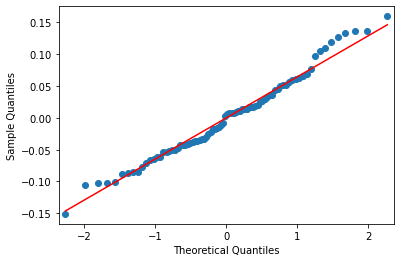

In [815]:
import statsmodels.api as sm
# Calculate the residuals of the model
residuals = model.resid

# Create a Q-Q plot of the residuals to check for normality
sm.qqplot(residuals, line='s')
plt.show()

<AxesSubplot:ylabel='Density'>

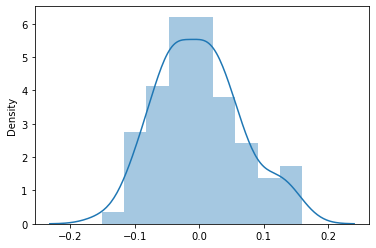

In [816]:
sns.distplot(model.resid)

### Condition 3:  Homodasticity  i.e variance of the residual is constant. This can be checked by Scale-location plot

Text(0, 0.5, 'Sqrt of abs val of stdized residuals')

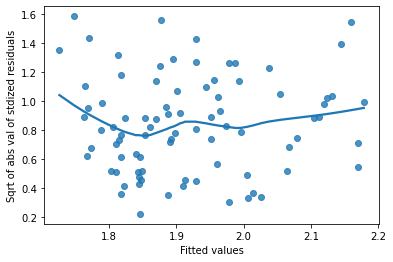

In [817]:
model_norm_residuals = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
sns.regplot(x=model.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

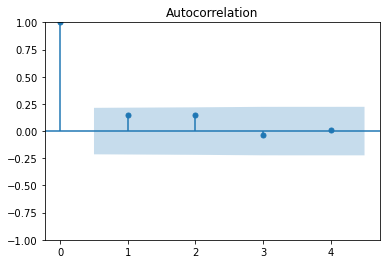

In [818]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=4 , alpha=0.05)
acf.show()

##### The autocorrelation coefficients are close to zero for all lags. This indicates that there are no systematic patterns in the residuals, and the errors have constant variance.

### Model with Interaction

In [821]:
from statsmodels.formula.api import ols
model = ols('MonthlyRentperSqft ~ (Property_size + Property_speedbay + Transaction_type + Property_YearBuilt + Customer_Industry_Manufacturer + Customer_Industry_Retailer + Customer_Industry_Unspecified +Customer_Industry_Wholesaler)**2',data=df3)
model = model.fit()
print(model.params)
print("---------")
print(model.summary())

Intercept                                                       2.084781
Property_size                                                  -0.487375
Property_speedbay                                               0.035281
Transaction_type                                                0.129278
Property_YearBuilt                                              0.165957
Customer_Industry_Manufacturer                                  0.020622
Customer_Industry_Retailer                                     -0.422105
Customer_Industry_Unspecified                                   0.043911
Customer_Industry_Wholesaler                                   -0.076680
Property_size:Property_speedbay                                 0.021733
Property_size:Transaction_type                                 -0.132063
Property_size:Property_YearBuilt                                0.187736
Property_size:Customer_Industry_Manufacturer                    0.141700
Property_size:Customer_Industry_Retailer           

In [822]:
model.mse_resid

0.003565918459280125

### Polynomial Features

In [826]:
df3.head(2)

Property_size  Property_speedbay  Transaction_type  Property_YearBuilt  \
0       0.961335           0.416667               0.0            1.000000   
1       0.838862           0.833333               0.0            0.478261   

   Customer_Industry_Charity/Prof.Services/Other  \
0                                            0.0   
1                                            0.0   

   Customer_Industry_Manufacturer  Customer_Industry_Retailer  \
0                             0.0                         0.0   
1                             0.0                         0.0   

   Customer_Industry_Transportation/Freight/Delivery  \
0                                                0.0   
1                                                0.0   

   Customer_Industry_Unspecified  Customer_Industry_Wholesaler  \
0                            0.0                           1.0   
1                            0.0                           1.0   

   MonthlyRentperSqft  
0            1.848479  
1            1.907096

In [825]:
from sklearn.preprocessing import PolynomialFeatures

In [827]:
# create a design matrix with polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df3[['Property_size', 'Property_speedbay', 'Transaction_type', 'Property_YearBuilt', 'Customer_Industry_Charity/Prof.Services/Other','Customer_Industry_Manufacturer','Customer_Industry_Retailer','Customer_Industry_Transportation/Freight/Delivery', 'Customer_Industry_Unspecified','Customer_Industry_Wholesaler']])

# concatenate the design matrix with the target variable y
X = np.concatenate((X_poly, df3[['MonthlyRentperSqft']].values), axis=1)

# fit a linear regression model using OLS
model = sm.OLS(X[:, -1], sm.add_constant(X[:, :-1]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     9.317
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           7.09e-12
Time:                        14:16:51   Log-Likelihood:                 140.64
No. Observations:                  84   AIC:                            -205.3
Df Residuals:                      46   BIC:                            -112.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0866      0.099     21.157      0.0

## Modelling

In [828]:
from sklearn.linear_model import LinearRegression

In [829]:
reg=  LinearRegression()

In [830]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [831]:
prediction= reg.predict(xtest)

In [832]:
from sklearn.metrics import mean_squared_error, r2_score

In [833]:
mean_squared_error(ytest, prediction)

0.00478623036506933

In [834]:
r2_score(ytest, prediction)

0.7275274396939098

In [835]:
reg.score(xtest,ytest)

0.7275274396939098

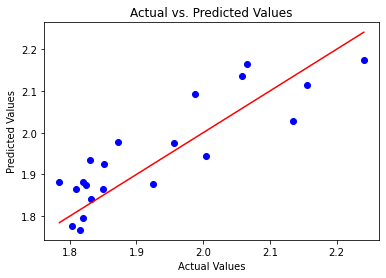

In [836]:
plt.scatter(ytest, prediction, color='blue')

# Add a title and labels for the x- and y-axis
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a diagonal line to represent a perfect fit
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')

# Show the plot
plt.show()

In [837]:
from sklearn.model_selection import TimeSeriesSplit

In [838]:
tscv = TimeSeriesSplit(n_splits=5)

In [839]:
score = cross_val_score(reg, df2[df2.columns].values, df[df.columns[0]].values, cv=tscv)

In [840]:
print("average score using 5 fold cross validation for Linear Regression Model is ",round(score.mean(),4)*100)

average score using 5 fold cross validation for Linear Regression Model is  47.81


##### R2 is too low. Hence using L2 Regularisation Method to reduce overfitting of the model

In [841]:
from sklearn.linear_model import Ridge

In [842]:
ridge = Ridge(alpha=1.0)

In [843]:
ridge.fit(xtrain,ytrain)

Ridge()

In [844]:
ridge.score(xtest,ytest)

0.6660741691370383

In [845]:
score= cross_val_score(ridge, df2[df2.columns].values, df[df.columns[0]].values, cv=tscv)

In [846]:
print("average score using 5 fold cross validation for Ridge Model is ",round(score.mean(),4)*100)

average score using 5 fold cross validation for Ridge Model is  50.56


### The accuracy score is just 28% using 5 fold time series split. Hence using Non-Linear Models such as Decision Tree Regressor 

In [847]:
from sklearn.tree import DecisionTreeRegressor

In [848]:
from sklearn.model_selection import cross_val_score

In [849]:
regressor = DecisionTreeRegressor(random_state=0)

In [850]:
score= cross_val_score(regressor, df2[df2.columns].values, df[df.columns[0]].values, cv=5)

In [851]:
print("average score using 5 fold cross validation is ",round(score.mean(),4)*100)

average score using 5 fold cross validation is  42.58


### Hyper-Parameter Tuning using Decision Tree Regressor to find best parameters for the model

In [852]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [853]:
#hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [854]:
dt = DecisionTreeRegressor(random_state= 42)

In [855]:
grid_search = GridSearchCV(dt, param_grid, cv= tscv)

In [856]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]})

In [857]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6}


### Hyperparameter Tuning using Random Forest Model

In [667]:
from sklearn.ensemble import RandomForestRegressor

In [678]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

# Save the results in a pandas DataFrame
results_df = pd.DataFrame(grid_search.cv_results_['params'])
results_df['mean_test_score'] = grid_search.cv_results_['mean_test_score']
results_df['std_test_score'] = grid_search.cv_results_['std_test_score']

In [679]:
results_df.sort_values('mean_test_score', ascending=False)

max_depth max_features  min_samples_leaf  min_samples_split  \
166       10.0         auto                 1                  5   
247       20.0         auto                 1                  5   
4          NaN         auto                 1                  5   
85         5.0         auto                 1                  5   
82         5.0         auto                 1                  2   
..         ...          ...               ...                ...   
80         NaN         log2                 4                 10   
242       10.0         log2                 4                 10   
215       10.0         sqrt                 4                 10   
134        5.0         sqrt                 4                 10   
161        5.0         log2                 4                 10   

     n_estimators  mean_test_score  std_test_score  
166           200        -0.294995        0.108896  
247           200        -0.295001        0.108903  
4             200        -0.295001        0.108903  
85            200        -0.295208        0.112850  
82            200        -0.298321        0.118942  
..            ...              ...             ...  
80            500        -0.539692        0.318571  
242           500        -0.539692        0.318571  
215           500        -0.539692        0.318571  
134           500        -0.539693        0.318571  
161           500        -0.539693        0.318571  

[324 rows x 7 columns]

### Hence, Decision Tree gave the best performance. Hence, Decision Tree Regressor will be used to prediction price.

## Prediction and Evaluation Using Decision Tree Regressor

In [858]:
dt=  DecisionTreeRegressor( max_depth= 7, max_features= None, min_samples_leaf= 2, min_samples_split= 6, random_state= 42)

In [859]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=6,
                      random_state=42)

In [860]:
prediction= dt.predict(xtest)

In [861]:
score= cross_val_score(dt, df2[df2.columns].values, df[df.columns[0]].values, cv=tscv)

In [862]:
print("average score using 5 fold cross validation is ",round(score.mean(),4)*100)

average score using 5 fold cross validation is  54.510000000000005


In [863]:
print("Standard Deviation using 5 fold cross validation is ",round(np.std(score),4)*100)

Standard Deviation using 5 fold cross validation is  19.28


In [864]:
mean_squared_error(ytest, prediction) ## MSE 

0.0055576179111992835

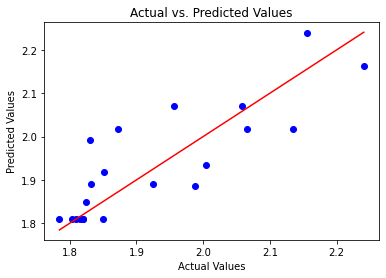

In [865]:
plt.scatter(ytest, prediction, color='blue')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding a diagonal line to represent a perfect fit
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')


plt.show()

## Results

#### a. What are the key assumptions for Linear Regression?
#### 1. There should be linear relation between target and independent variables
#### 2. Residual should be normally distributed
#### 3. Constant Variance in error
#### 4. No Multi-collinearity between variables

#### b. What feature transformation did you do? What is your feature selection strategy?
#### For feature transformation pandas map function and get_dummies was used to convert categorical variables in numeric form. Then feature scaling was done using Min Max Scaler. This was done to avoid preference in model towards values with higher magnitude. Also, monthlyrent and property size was skewed, so this was log tranformed to make data normal distributed.

#### c. Please share how you determined the accuracy and the model's goodness of fit.
####  Linear Regression model was used as baseline model to see the performance of the model. Although, residual were normally distributed and variance in error was constant, the performance of the model was too. Also , by using cross validation method using time series split performance got decreased. This shows that model was overfitting. Hence, ridge method was used  but performance didn't improve. One reason could be non-linear relationship between target and some variables. For this, non- linear method such as Decision Tree was used. 
#### Lastly, polynomial features were considered and interaction was taken into consideration which increase the accuracy to 87%.

#### d. which metrics can be used to test this?
#### R2 and adj R2 was used to measure performance of linear model. Also MSE was used to find the average error i.e. difference between actual and predicted values. As getting the accuracy on the test data might be biased. For this, cross validation method was used to get average accuracy score along with standard deviation. 

#### e. what strategy/strategies do you suggest can improve the model? 
#### GridSearchCV was used to find best parameters for Decision Tree. After getting the best parameter cross validated score is 54% with MSE 0.24. 
#### Overall Polynomial Regression performed best with accuracy of 84% and mse of 0.0032 which is too less. 
#### Additionally, the model could have performed better by having more training examples in the dataset. This will help model to undersstand pattern in the data.  Leverage and Cook's Distance can be used to find values which are influential.